In [1]:
## 尝试一下调参数: W初始化 b初始化 学习率 batch_size大小 结果会很不一样

In [2]:
import numpy as np
from matplotlib import pyplot as plt 

In [26]:
data = []
label = []
with open("data.txt") as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip().split(",")
        data.append([float(line[0]),float(line[1])])
        label.append(int(line[2]))
    

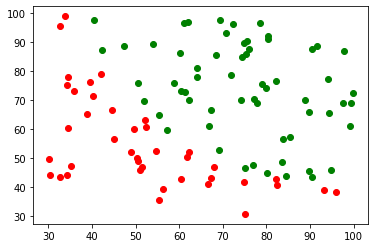

In [27]:
for i,d in enumerate(data):
    x1 = d[0]
    x2 = d[1]
    y = label[i]
    plt.scatter(x1,x2,color="green" if y==1 else "red")
plt.show()

In [51]:
class LogisticRegression():
    def __init__(self,input_dim,learn_rate=0.001):
        #a two label classifer demo
        self.W = np.random.randn(input_dim)
        self.b = 0
        self.learn_rate = learn_rate
    
    
    def sigmoid(self,x):
        y = 1/(1+np.exp(-x))
        return y
        
    def linear(self,x):
        y = np.dot(x,self.W)+self.b
        return y
    
    def __call__(self,input):
        y = self.sigmoid(self.linear(input))
        return y
    
    def cost(self,input,label):
        x = np.array(input)
        y = np.array(label)
        m = x.shape[0]
        output = self.__call__(x)
        avg_cost = -(1/m) * np.sum(( y*np.log(output) + (1-y)*np.log(1-output) ))
        return avg_cost
    
    def gradient_descent(self,input,label):
        x = np.array(input)
        y = np.array(label)
        m = x.shape[0]
        output = self.__call__(x)
        gradient_w = 1/m*np.dot((output-label).T,x)
        gradient_b = 1/m*np.sum(output-label)
        self.W = self.W - self.learn_rate*gradient_w
        self.b = self.b - self.learn_rate*gradient_b
        
    

In [70]:
model = LogisticRegression(2)

In [71]:
#batch为2
batch_size = 2
for i in range(0,len(data),batch_size):
    d = data[i:i+batch_size]
    y = label[i:i+batch_size]
    model.gradient_descent(d,y)

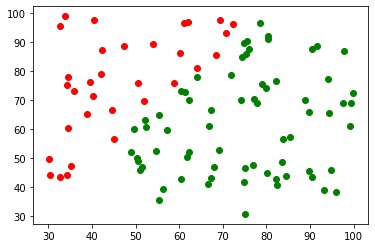

In [72]:
y = model(data)
for x,c in zip(data,y):
    plt.scatter(x[0],x[1],color="green" if c>=0.8 else "red")